# Application Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

Set path:

In [2]:
path = 'C:/Users/Meier/Institut für Statistik Dropbox/Johanna Meier/Structural Breaks + DL/Application/'

Set dataset:

In [3]:
data_names = ['voltage_2022-09-18','voltage_2022-10-01','voltage_2022-10-08','voltage_2023-01-08']

Set metric:

In [4]:
metric = 0 # RMSE: 0, MAE: 1, MAPE: 2, R^2: 3

## Best Performance

In [19]:
ind = ['EQUAL', 'EXP', 'RAY', 'BAR', 'PAR', 'TUK']
col1 = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
col2 = ['RNN','LSTM','GRU']
columns = pd.MultiIndex.from_tuples(list(itertools.product(col1, col2)))
df_best = pd.DataFrame(columns = columns, index = ind)
df_best.index.names = ['Weights']
df_best = df_best.T

In [20]:
dates = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
#str_model = ['RNN', 'LSTM', 'GRU']
weight_type = ['exponential', 'rayleigh', 'bartlett', 'parzen' , 'tukey-hanning']
#dates = ['18/09/2022']
str_model = ['RNN']
#weight_type = ['exponential']
for k in range(len(dates)):
    for i in range(len(str_model)):
        for j in range(len(weight_type)+1):
            if j==0:
                with np.load(path+'Results/'+data_names[k]+'_'+str_model[i]+'_results.npz') as data:
                    df_best.loc[(col1[k],col2[i]),ind[j]] = np.round(data['best_metrics'][0][metric],4)
            else:
                with np.load(path+'Results/'+data_names[k]+'_'+str_model[i]+'_'+weight_type[j-1]+'_results.npz') as data:
                    df_best.loc[(col1[k],col2[i]),ind[j]] = np.round(data['best_metrics'][0][metric],4)

In [21]:
df_best

Weights           EQUAL     EXP     RAY     BAR     PAR     TUK
18/09/2022 RNN   0.1767  0.1726  0.1721  0.1721  0.1724  0.1722
           LSTM     NaN     NaN     NaN     NaN     NaN     NaN
           GRU      NaN     NaN     NaN     NaN     NaN     NaN
01/10/2022 RNN   0.2466  0.2438  0.2418  0.2484   0.247  0.2473
           LSTM     NaN     NaN     NaN     NaN     NaN     NaN
           GRU      NaN     NaN     NaN     NaN     NaN     NaN
08/10/2022 RNN   0.1965  0.1929  0.1888  0.1932   0.189  0.1979
           LSTM     NaN     NaN     NaN     NaN     NaN     NaN
           GRU      NaN     NaN     NaN     NaN     NaN     NaN
08/01/2023 RNN   0.1826  0.1679   0.166  0.1655  0.1727  0.1782
           LSTM     NaN     NaN     NaN     NaN     NaN     NaN
           GRU      NaN     NaN     NaN     NaN     NaN     NaN

In [22]:
print(df_best.to_latex(escape=False))

\begin{tabular}{llllllll}
\toprule
           & Weights &   EQUAL &     EXP &     RAY &     BAR &     PAR &     TUK \\
\midrule
18/09/2022 & RNN &  0.1767 &  0.1726 &  0.1721 &  0.1721 &  0.1724 &  0.1722 \\
           & LSTM &     NaN &     NaN &     NaN &     NaN &     NaN &     NaN \\
           & GRU &     NaN &     NaN &     NaN &     NaN &     NaN &     NaN \\
01/10/2022 & RNN &  0.2466 &  0.2438 &  0.2418 &  0.2484 &   0.247 &  0.2473 \\
           & LSTM &     NaN &     NaN &     NaN &     NaN &     NaN &     NaN \\
           & GRU &     NaN &     NaN &     NaN &     NaN &     NaN &     NaN \\
08/10/2022 & RNN &  0.1965 &  0.1929 &  0.1888 &  0.1932 &   0.189 &  0.1979 \\
           & LSTM &     NaN &     NaN &     NaN &     NaN &     NaN &     NaN \\
           & GRU &     NaN &     NaN &     NaN &     NaN &     NaN &     NaN \\
08/01/2023 & RNN &  0.1826 &  0.1679 &   0.166 &  0.1655 &  0.1727 &  0.1782 \\
           & LSTM &     NaN &     NaN &     NaN &     NaN &     NaN &

## Overall Performance

In [11]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Select model:

In [14]:
str_model = 'RNN'

In [12]:
dates = ['18/09/2022','01/10/2022','08/10/2022','08/01/2023']
weight_type = ['exponential', 'rayleigh', 'bartlett', 'parzen' , 'tukey-hanning']
#dates = ['18/09/2022','01/10/2022']
#weight_type = ['exponential']

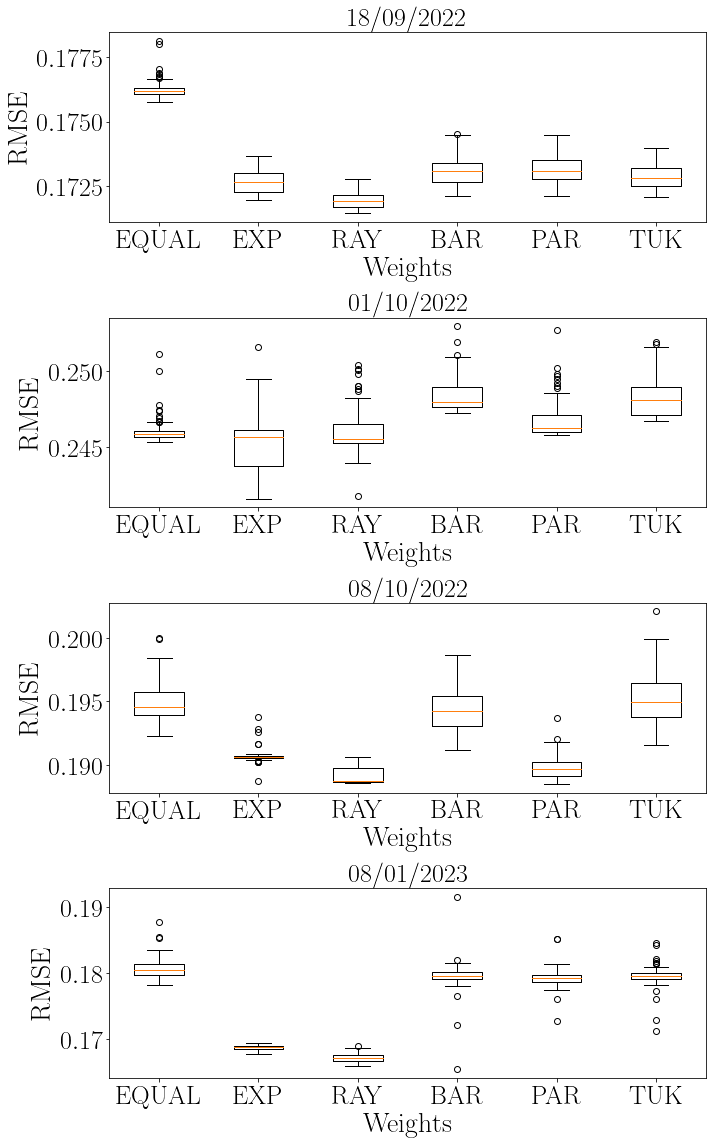

In [18]:
fig, axs = plt.subplots(len(dates),1, figsize=(10, 16))
for i in range(len(dates)):
    df_data = pd.DataFrame()
    for j in range(len(weight_type)+1):
        if j==0:
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
        else:    
            with np.load(path+'Results/'+data_names[i]+'_'+str_model+'_'+weight_type[j-1]+'_results.npz') as data:
                df_data = pd.concat([df_data,pd.DataFrame(data['all_metrics'][:,metric])], axis=1, ignore_index=True)
    axs[i].boxplot(df_data)
    axs[i].set_title(dates[i])
    axs[i].set_xlabel('Weights')
    axs[i].set_ylabel('RMSE')
    axs[i].set_xticks(list(range(1,len(weight_type)+2)),ind[:len(weight_type)+1])

fig.tight_layout()
plt.savefig(path+'Figures/'+'overallperf_voltage_'+str_model+'.pdf', bbox_inches='tight')
plt.show()